<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#ECDF-and-Functions" data-toc-modified-id="ECDF-and-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ECDF and Functions</a></span></li><li><span><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scatter Plots</a></span></li><li><span><a href="#Swarm-Plots" data-toc-modified-id="Swarm-Plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Swarm Plots</a></span></li></ul></div>

## Description
Visualization is one of the essential skills in data science. It helps us get a better feeling of
the data at hand. In this problem, we are going to get familiar with visualization in python using the iris dataset. Refer to sklearn documentation for finding the proper commands.

**Note**: All of your plots in this notebook should have these attributes:
* Title
* X label
* Y label

## Import 
Put all of your imports in the cell below.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets

## Loading Dataset
* Load the iris dataset from sklearn library. 
* Display the keys of the dataset and print the discription. 

In [3]:
dataset = datasets.load_iris()
print('Keys of the dataset: ', dataset.keys())
print('\nDescription:\n')
print('Feature Names: ', dataset.feature_names)
print('\nTarget Names: ', dataset.target_names)
print('\nSize of feature matrix(X): {}\n'.format(dataset.data.shape))
print('Size of target matrix(y): {}\n'.format(dataset.target.shape))

dataset.DESCR


Keys of the dataset:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Description:

Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names:  ['setosa' 'versicolor' 'virginica']

Size of feature matrix(X): (150, 4)

Size of target matrix(y): (150,)



'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

## Histograms
Use matplotlib library and plot the histogram of petal length (one of the four features) for Versicolor (one of the species of iris). 

**Note**: Set the number of bins equal to the square root of the number of Versicolor data points. 

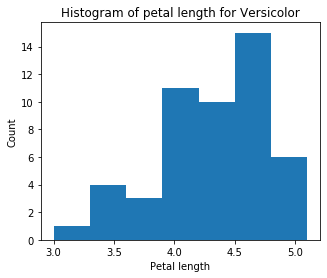

In [3]:
X = dataset.data
y = dataset.target
petal_versicolor = X[y == 1, 2]
fig, ax = plt.subplots(figsize = (5, 4))
ax.hist(petal_versicolor, bins=int(np.sqrt(sum(y==1))));
plt.xlabel('Petal length');
plt.ylabel('Count');
plt.title('Histogram of petal length for Versicolor');
plt.show();

## ECDF and Functions 

Write a function that takes a one-dimensional NumPy array as input and returns two arrays of x and y which together are going to draw an empirical distribution function or ECDF. 

In [4]:
def ecdf(data):
    ef = lambda x: (1.0 / len(data)) * sum(data <= x) 
    vef = np.vectorize(ef)
    x = np.arange(np.amin(data) - 0.1, np.amax(data) + 0.2, 0.01)
    y = vef(x)
    return x, y

Plot the ECDF of petal length for all three species in a single window.

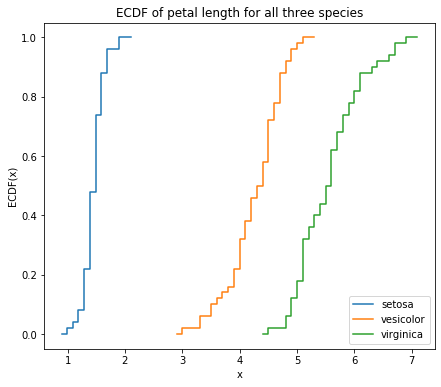

In [5]:
x02, y02 = ecdf(X[y == 0, 2])
x12, y12 = ecdf(X[y == 1, 2])
x22, y22 = ecdf(X[y == 2, 2])

fig1, ax1 = plt.subplots(figsize = (7, 6))
ax1.step(x02, y02, label='setosa');
ax1.step(x12, y12, label='vesicolor');
ax1.step(x22, y22, label='virginica');
plt.xlabel('x');
plt.ylabel('ECDF(x)');
plt.title('ECDF of petal length for all three species');
plt.legend()
plt.show();

Your plot should look like something like this:

![](img1.png)

**Note**: The graph above was plotted for some exponential distributions and your answer will look different.

Repeat the last section for the other three features.

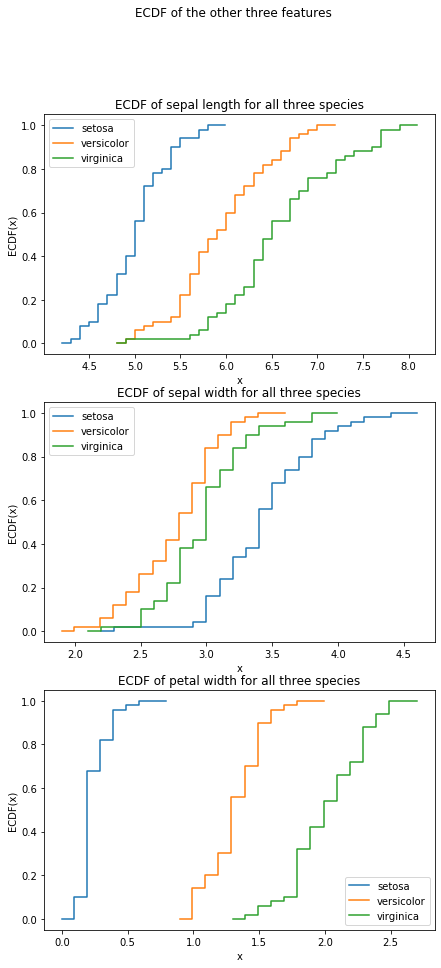

In [6]:
x00, y00 = ecdf(X[y == 0, 0])
x10, y10 = ecdf(X[y == 1, 0])
x20, y20 = ecdf(X[y == 2, 0])
x01, y01 = ecdf(X[y == 0, 1])
x11, y11 = ecdf(X[y == 1, 1])
x21, y21 = ecdf(X[y == 2, 1])
x03, y03 = ecdf(X[y == 0, 3])
x13, y13 = ecdf(X[y == 1, 3])
x23, y23 = ecdf(X[y == 2, 3])

plt.figure(figsize=(7, 15))

plt.subplot(311)
plt.step(x00, y00, x10, y10, x20, y20)
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.title('ECDF of sepal length for all three species');

plt.subplot(312)
plt.step(x01, y01, x11, y11, x21, y21)
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.title('ECDF of sepal width for all three species');

plt.subplot(313)
plt.step(x03, y03, x13, y13, x23, y23)
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.title('ECDF of petal width for all three species');

plt.suptitle('ECDF of the other three features')
plt.show()

## Scatter Plots

Plot six two-dimensional scatter plots for every two features.

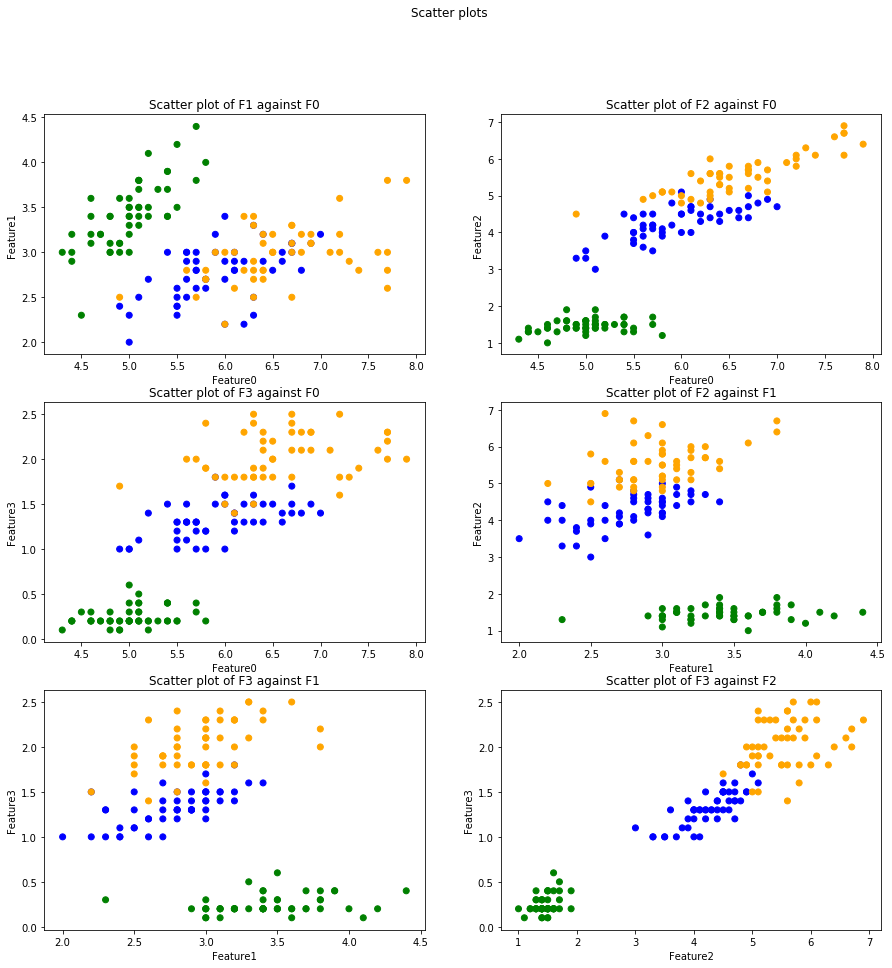

In [7]:
f0 = X[:, 0]
f1 = X[:, 1]
f2 = X[:, 2]
f3 = X[:, 3]
plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.scatter(f0, f1, c=y, cmap=color.ListedColormap(["green", "blue", "orange"]))
plt.xlabel('Feature0')
plt.ylabel('Feature1')
plt.title('Scatter plot of F1 against F0');

plt.subplot(322)
plt.scatter(f0, f2, c=y, cmap=color.ListedColormap(["green", "blue", "orange"]))
plt.xlabel('Feature0')
plt.ylabel('Feature2')
plt.title('Scatter plot of F2 against F0');

plt.subplot(323)
plt.scatter(f0, f3, c=y, cmap=color.ListedColormap(["green", "blue", "orange"]))
plt.xlabel('Feature0')
plt.ylabel('Feature3')
plt.title('Scatter plot of F3 against F0');

plt.subplot(324)
plt.scatter(f1, f2, c=y, cmap=color.ListedColormap(["green", "blue", "orange"]))
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot of F2 against F1');

plt.subplot(325)
plt.scatter(f1, f3, c=y, cmap=color.ListedColormap(["green", "blue", "orange"]))
plt.xlabel('Feature1')
plt.ylabel('Feature3')
plt.title('Scatter plot of F3 against F1');

plt.subplot(326)
plt.scatter(f2, f3, c=y, cmap=color.ListedColormap(["green", "blue", "orange"]))
plt.xlabel('Feature2')
plt.ylabel('Feature3')
plt.title('Scatter plot of F3 against F2');

plt.suptitle('Scatter plots')
plt.show()

An example for scatter plots:

![](img2.png)

Compute the covariance of two random variables petal length and petal width for Versicolor using NumPy.

In [8]:
rv1 = X[y == 1, 2]
rv2 = X[y == 1, 3]
cov = np.cov(rv1, rv2)[0][1]
print(cov)

0.07310204081632653


## Swarm Plots

First, import pandas and seaborn libraries. Then convert the sklearn dataset you had to a data frame. Draw four [swarm plot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) that should look like this:

![](img3.png)

The Y-axis represents one of your features each time, and the columns in the X-axis represent different species of iris.

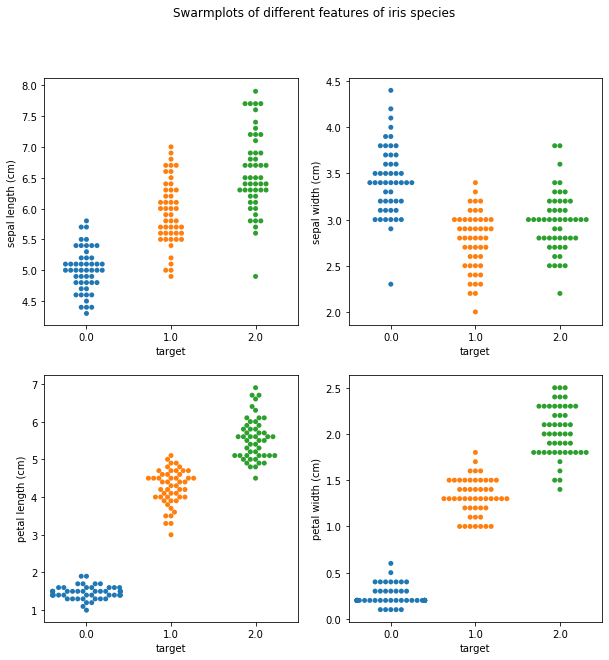

In [34]:
df = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])
plt.figure(figsize=(10, 10))
plt.subplot(221)
ax = sns.swarmplot(y=df.columns[0], x="target", data=df)
plt.subplot(222)
ax = sns.swarmplot(y=df.columns[1], x="target", data=df)
plt.subplot(223)
ax = sns.swarmplot(y=df.columns[2], x="target", data=df)
# ax = sns.boxplot(y=df.columns[2], x="target", data=df)
plt.subplot(224)
ax = sns.swarmplot(y=df.columns[3], x="target", data=df)
# ax = sns.boxplot(y=df.columns[3], x="target", data=df)
plt.suptitle('Swarmplots of different features of iris species');

**Question**: According to the plots above, breifly explain which of the four features best differentiates between the three species of iris? (the prominent feature that helps us classify our data)

<font color='red'>It should be the feature that varies among different species of iris mostly. I think it's petal width(if we use draw boxplots too, we could see that petal width is a little better than petal length)</font>